<a href="https://colab.research.google.com/github/changsin/AI/blob/main/8.7.naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naive Bayes

The following is an explanation of Naive Bayes (8.7) in Ertel's Artificial Intelligence.

## Naive Bayes class

The code is adapted from [ML from Scratch Naive Bayes](https://github.com/python-engineer/MLfromscratch/blob/master/mlfromscratch/naivebayes.py) with the accompanying [video](https://www.youtube.com/watch?v=BqUmKsfSWho).

** Note that I fixed minor bugs in the calculation of the pdf below.

$$ P(y|X) = \large \frac{P(X|y) \cdot P(y)}{P(X)} $$

- P(y|X): the posterior
- P(X|y): likelihood - class conditional probability
- P(X): evidence
- P(y): prior probability

You can calculate the posterior conditional probabilities for all classes and the one with the highest probability is the predicted class. In other words,

$$ y = argmax_yP(y|X) $$

But given that each class variable is independent of each other (which is why it is called the "naive Bayes"), it is turned into:

$$ = argmax_y\frac{P(x_1|y)P(x2|y)...P(x_n|y) \cdot P(y)}{P(X)} $$

The formula can be simplied further by dropping P(X) because it is a constant factor for all probabilities. 

$$ = argmax_y P(x_1|y)P(x2|y)...P(x_n|y) \cdot P(y) $$

The probabilities are all between zero and one so multiplying fractions will make the values approach to zero or in some cases becomes a zero probability. To avoid this problem, we want to use the log probabilities instead:


$$ = argmax_y log(P(x_1|y)) + log(P(x2|y))...log(P(x_n|y)) + log(P(y)) $$

So this is what we are going to use to code.


### Prior probabilities
$ P(y) $: frequency of the class sample in the data
### Class conditional probability
For class conditional probabilities, let's use the Gaussian distribution (i.e., the normal distribution):

$$ P(x_i|y) = \frac{1}{\sqrt {2\pi\sigma_y^2}} \cdot exp(-\frac{(x_i - \mu_i)^2}{2\sigma_y^2}) $$

In [ ]:
import numpy as np
from scipy.stats import norm

class NaiveBayes:

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        # calculate mean, var, and prior for each class
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors =  np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self._classes):
            X_c = X[y==c]
            self._mean[idx, :] = X_c.mean(axis=0)
            self._var[idx, :] = X_c.var(axis=0)
            self._priors[idx] = X_c.shape[0] / float(n_samples)

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []

        # calculate posterior probability for each class
        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            posterior = np.sum(np.log(self._pdf(idx, x)))
            posterior = prior + posterior
            posteriors.append(posterior)
            
        # return class with highest posterior probability
        return self._classes[np.argmax(posteriors)]
            

    # probability density function
    # NB; the original code had minor bugs which I fixed below.
    #   the original code was
    #     numerator = np.exp(- (x-mean)**2 / (2 * var))
    #     denominator = np.sqrt(2 * np.pi * var)
    #
    #   Note that var was not squared.
    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]

        # This is just an implementation of the normal density function.
        # The results are identical with the standard library function
        #
        numerator = np.exp(- (x-mean)**2 / (2 * var**2))
        denominator = np.sqrt(2 * np.pi * var**2)
        class_cps = numerator / denominator
        #
        # class_cps = norm.pdf(x, loc=mean, scale=var)

        # print("class_conditional probabilities", class_cps)
        # print("  norm.pdf", norm.pdf(x, loc=mean, scale=var))

        return class_cps

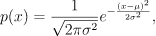

# Test
Using the NaiveClass, we can run against the skiing example in 8.4. We can see that it correctly classified all examples except one.

In [ ]:
import matplotlib.pyplot as plt

X = np.array([
      [6., 1.],
      [7., 3.],
      [8., 2.],    
      [9., 0.],
      [8., 4.],
      [8., 6.],
      [9., 2.],    
      [9., 5.]
    ])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1])

In [ ]:
X.shape

(8, 2)

In [ ]:
model_nb = NaiveBayes()
model_nb.fit(X, y)
predictions = model_nb.predict(X)
predictions

array([0, 0, 0, 0, 1, 1, 0, 1])

In [ ]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

accuracy(y, predictions)

0.875

# Naive Bayes for XOR?
Would the naive Bayes model be able to solve the XOR problem?

In [ ]:
X_xor = np.array([[1., 1.],
                  [1., 0.],
                  [0., 1.],
                  [0., 0.]])
y_xor = np.array([0., 1., 1., 0.])

model_xor = NaiveBayes()
model_xor.fit(X_xor, y_xor)
predictions = model_xor.predict(X_xor)
predictions

array([0., 0., 0., 0.])